### Neural Network (Lab 12)

#### Basic neural network for 4 nodes and 2 layers

Outputs: 

Optimized W1(Hyperparameter for layer 1)
[[0.96418972 0.52380294]
 [1.03928779 0.59726906]
 [0.98650427 0.545409  ]
 [0.58027818 0.17310356]] 

Optimized W2(Hyperparameter for layer 2)
[[1.11163322 1.31901674 1.1823407  0.18294696]] 

Optimized b1(Bias for layer 1)
[-0.30199487 -0.34900749  0.2183006   0.45853504] 

Optimized b2(Bias for layer 2)
-2.5169965216091588 

The error from the training dataset is  0.5641502594309102
The error from testing dataset is 0.5632210429919952 

The predicted labels for test datset from this model
[1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1]
The actual labels for test dataset are
[1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1]



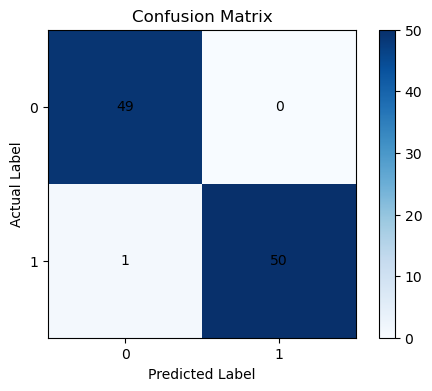

Evaluation Metrics
The accuracy of the prediction by the model for test dataset is  0.99
Precision,Recall,F1_score tally
Precision = 1.0
Recall =  0.9803921568627451
F1 score =  0.99009900990099


In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_score,recall_score,f1_score
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn import datasets
df=pd.read_csv('Logistic_regression_ls.csv')
n = 2 #Number of features to be considered
x = np.array(df.iloc[:, 0:n])
y= np.array(df.loc[:,'label'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Normalising the train dataset
x_train_1=x_train[:,0]/max(x_train[:,0])
x_train_2=x_train[:,1]/max(x_train[:,1])
x_train = np.column_stack((x_train_1,x_train_2))

# Normalising the test data

x_test_1=x_test[:,0]/max(x_test[:,0])
x_test_2=x_test[:,1]/max(x_test[:,1])
x_test = np.column_stack((x_test_1,x_test_2))
m_train=len(x_train)
m_test=len(x_test)
N = 4 # number of nodes(neurons) in the hidden layer
print("Outputs: ")
print()
class Neural_Network():
    
    def __init__(self,N):
        # Initial guess for W1,W2,b1,b2
        self.W1_s = np.array([[0.5,0.1]]*N)
        np.random.seed(670)
        self.b1_s = np.random.rand(N,m_train)
        
        self.W2_s = np.random.rand(1,N)
        self.b2_s = np.array(([-2])*m_train).T
        
    #Activation function(Sigmoid)    
    def A(self,Z):
        a = 1/(1+np.exp(-1*Z))
        return a


    #Forward Propogation         
    def forward_prop(self,w1,w2,b1,b2):
        self.W1 = w1
        self.b1 = b1
        self.W2 = w2
        self.b2 = b2
        self.Z1 = np.matmul(self.W1,x_train.T)+self.b1
        self.a1 = self.A(self.Z1)
        self.Z2 = np.matmul(self.W2,self.a1)+self.b2
        self.a2 = self.A(self.Z2)
        return self.a2
    def forward_prop_test(self,w1,w2,b1,b2):
        self.W1_test = w1
        self.b1_test = b1
        self.W2_test = w2
        self.b2_test = b2
        self.Z1_test = np.matmul(self.W1_test,x_test.T)+self.b1_test
        self.a1_test = self.A(self.Z1_test)
        self.Z2_test = np.matmul(self.W2_test,self.a1_test)+self.b2_test
        self.a2_test = self.A(self.Z2_test)
        return self.a2_test


   
    def cost_func_train(self,w1,w2,b1,b2):
        self.a2 = self.forward_prop(w1,w2,b1,b2)
        sum1 = np.sum((-y_train*(np.log(self.a2))-(1-y_train)*(np.log(1-self.a2))))
        self.J = sum1/(m_train) #cost function
        return self.J
    def cost_func_test(self,w1,w2,b1,b2):
        self.a2_test = self.forward_prop_test(w1,w2,b1,b2)
        sum1 = np.sum((-y_test*(np.log(self.a2_test))-(1-y_test)*(np.log(1-self.a2_test))))
        self.J_test = sum1/(m_test) #cost function
        return self.J_test
    
    #Backward propagation 
    def back_prop(self,w1,w2,b1,b2):
        self.a2 = self.forward_prop(w1,w2,b1,b2)
        self.dZ_2 = self.a2 - y_train
        self.dW_2 = np.matmul(self.dZ_2,self.a1.T)/m_train
        self.db_2 = np.sum(self.dZ_2,axis =1 ,keepdims =True)/m_train
        self.dZ_1 = (np.matmul(self.W2.T,self.dZ_2))*(self.a1*(1-self.a1))
        self.dW_1 = np.matmul(self.dZ_1,x_train)/m_train
        self.db_1 = np.sum(self.dZ_1, axis =1 ,keepdims =True)/m_train
        
       
    def steepest_gradient(self,alpha,k):
        self.W1 = self.W1_s
        self.W2 = self.W2_s
        self.b1 = self.b1_s
        self.b2 = self.b2_s
        for i in range(1,k):#Stopping criteria to stop after k iterations
            self.back_prop(self.W1,self.W2,self.b1,self.b2)
            self.W1 = (self.W1-alpha*self.dW_1)
            self.W2 = (self.W2-alpha*self.dW_2)
            self.b1 = (self.b1-alpha*self.db_1)
            self.b2 = (self.b2-alpha*self.db_2)
        self.a2_test = self.forward_prop_test(self.W1,self.W2,np.array([self.b1[:,0]]*m_test).T,np.array([self.b2[0,0]]*m_test).T)
        return self.W1,self.W2,self.b1,self.b2,self.a2_test
    def minimum(self):
        min_J_train = self.cost_func_train(self.W1,self.W2,self.b1,self.b2) 
        min_J_test = self.cost_func_test(self.W1,self.W2,np.array([self.b1[:,0]]*m_test).T,np.array([self.b2[0,0]]*m_test).T) 
        return min_J_train,min_J_test
# w_s = [2,0.1,0.1]
c1 = Neural_Network(N)
k = 3000 #Number of steps before stopping
alpha = 0.01
W1,W2,b1,b2,a2_test = c1.steepest_gradient(alpha,k)
print("Optimized W1(Hyperparameter for layer 1)")
print(W1,"\n")
print("Optimized W2(Hyperparameter for layer 2)")
print(W2,"\n")
print("Optimized b1(Bias for layer 1)")
print(b1[:,0],"\n")
print("Optimized b2(Bias for layer 2)")
print(b2[0,0],"\n")
a2_test = a2_test[0].tolist()
error_train,error_test = c1.minimum()
print("The error from the training dataset is ",error_train)
print("The error from testing dataset is",error_test,"\n")
y_pred  = np.array([1 if a2_test[i]>0.5 else 0  for i in range(m_test)])
print("The predicted labels for test datset from this model")
print(y_pred)
print("The actual labels for test dataset are")
print(y_test)
print()

def confusion_mat(y_test,y_pred,num_classes):
    conf_matrix = [[0 for i in range(num_classes)] for j in range(num_classes)]
    for i in range(len(y_test)):
        actual_class = y_test[i]
        pred_class = y_pred[i]
        conf_matrix[actual_class][pred_class]+=1 #The row refer to the actual class and column refer to the predicted class in the confusion matrix
    return conf_matrix
def class_report(conf_matrix):
    conf_matrix = conf_matrix
    i=1
    TP = conf_matrix[i][i] 
    row_sum = sum([conf_matrix[i][j] for j in range(num_classes)])#TP+FN since rows are actual data and columns are predicted data in my confusion matrix
    column_sum = sum([conf_matrix[j][i] for j in range(num_classes)])#TP+FP
    precision = TP/column_sum
    recall = TP/row_sum
    f1_score = 2*(precision*recall)/(precision+recall)
    print("Precision,Recall,F1_score tally")
    print("Precision =",precision) 
    print("Recall = ",recall)
    print("F1 score = ",f1_score)
num_classes = 2
conf_matrix = np.array(confusion_mat(y_test,y_pred,num_classes))
fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(conf_matrix, cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix')
plt.show()



#Evaluation Matrix
print("Evaluation Metrics")
a = [conf_matrix[i][i] for i in range(num_classes)]
sum_accurate = sum(a)
accuracy = sum_accurate/len(y_test)
print("The accuracy of the prediction by the model for test dataset is ",accuracy)
class_report(conf_matrix)


# using sklearn to check my answers
# print(precision_score(y_test,y_pred))
# print(recall_score(y_test,y_pred))
# print(f1_score(y_test,y_pred))
#Note here I have considered both actual value =1 and predicted value=1 as my TP
#Note we can also get 100% accuracy if we increase the number of iterations to k=3000 but computation will be slower.





### Effect of varying the number of nodes(neurons)

For 1 nodes
The accuracy of the prediction by the model for test dataset is  0.95
Precision,Recall,F1_score tally
Precision = 1.0
Recall =  0.9019607843137255
F1 score =  0.9484536082474228

For 2 nodes
The accuracy of the prediction by the model for test dataset is  0.95
Precision,Recall,F1_score tally
Precision = 1.0
Recall =  0.9019607843137255
F1 score =  0.9484536082474228

For 3 nodes
The accuracy of the prediction by the model for test dataset is  0.99
Precision,Recall,F1_score tally
Precision = 1.0
Recall =  0.9803921568627451
F1 score =  0.99009900990099

For 4 nodes
The accuracy of the prediction by the model for test dataset is  0.99
Precision,Recall,F1_score tally
Precision = 1.0
Recall =  0.9803921568627451
F1 score =  0.99009900990099

For 5 nodes
The accuracy of the prediction by the model for test dataset is  0.98
Precision,Recall,F1_score tally
Precision = 0.9622641509433962
Recall =  1.0
F1 score =  0.9807692307692307

For 6 nodes
The accuracy of the prediction by the

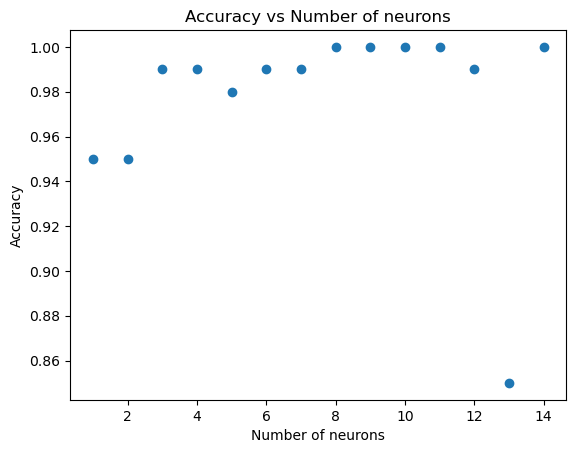

In [413]:
acc_list = []
num = [i for i in range(1,15)] 
k = 3000
for N in range (1,15):
    print(f"For {N} nodes")
    c1 = Neural_Network(N)
    W1,W2,b1,b2,a2_test = c1.steepest_gradient(alpha,k)
    a2_test = a2_test[0].tolist()
    y_pred  = np.array([1 if a2_test[i]>0.5 else 0  for i in range(m_test)])
    conf_matrix = np.array(confusion_mat(y_test,y_pred,num_classes))
    a = [conf_matrix[i][i] for i in range(num_classes)]
    sum_accurate = sum(a)
    accuracy = sum_accurate/len(y_test)
    print("The accuracy of the prediction by the model for test dataset is ",accuracy)
    acc_list.append(accuracy)
    class_report(conf_matrix)
    print()

plt.scatter(num,acc_list)
plt.xlabel("Number of neurons")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of neurons")
plt.show()


#Answer : The graph shown shows that on increasing the number of neurons can possibly increase the accuracy of prediction. 

### Changing the activation function to tanh

Output:

Optimized W1(Hyperparameter for layer 1)
[[ 0.82832279  0.449401  ]
 [ 0.95608875  0.58052964]
 [ 0.84718847  0.46738516]
 [ 0.04386691 -0.36803378]] 

Optimized W2(Hyperparameter for layer 2)
[[ 0.67796293  0.76271415  0.6027849  -0.52638073]] 

Optimized b1(Bias for layer 1)
[-0.57160298 -0.76876217 -0.07392042  1.10247099] 

Optimized b2(Bias for layer 2)
0.38575159705278916 

The predicted labels for test dataset from this model
[1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1]


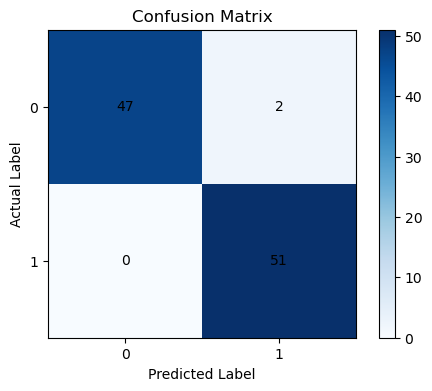

The accuracy of the prediction by the model for test dataset is  0.98
Precision,Recall,F1_score tally
Precision = 0.9622641509433962
Recall =  1.0
F1 score =  0.9807692307692307


In [412]:
print("Output:\n")
class Neural_Network_tan_func():
    
    def __init__(self,N):
        self.W1_s = np.array([[0.5,0.1]]*N)
        np.random.seed(670)
        self.b1_s = np.random.rand(N,m_train)
        self.W2_s = np.random.rand(1,N)
        self.b2_s = np.array(([2])*m_train).T
        
    #Activation function(Tanh)    
    def tanh(self,Z):
        return np.tanh(Z)
    
    def tanh_derivative(self,Z):
        return 1 - np.square(np.tanh(Z))
    

    #Forward Propogation         
    def forward_prop(self,w1,w2,b1,b2):
        self.W1 = w1
        self.b1 = b1
        self.W2 = w2
        self.b2 = b2
        self.Z1 = np.matmul(self.W1,x_train.T)+self.b1
        self.a1 = self.tanh(self.Z1)
        self.Z2 = np.matmul(self.W2,self.a1)+self.b2
        self.a2 = self.tanh(self.Z2)
        return self.a2
    def forward_prop_test(self,w1,w2,b1,b2):
        self.W1_test = w1
        self.b1_test = b1
        self.W2_test = w2
        self.b2_test = b2
        self.Z1_test = np.matmul(self.W1_test,x_test.T)+self.b1_test
        self.a1_test = self.tanh(self.Z1_test)
        self.Z2_test = np.matmul(self.W2_test,self.a1_test)+self.b2_test
        self.a2_test = self.tanh(self.Z2_test)
        return self.a2_test


    #Backward propagation 
    def cost_func_train(self,w1,w2,b1,b2):
        self.a2 = self.forward_prop(w1,w2,b1,b2)
        sum1 = np.sum(np.square(self.a2-y_train))
        self.J = sum1/(2*m_train) #cost function
        return self.J
    def cost_func_test(self,w1,w2,b1,b2):
        self.a2_test = self.forward_prop_test(w1,w2,b1,b2)
        sum1 = np.sum(np.square(self.a2_test-y_test))
        self.J_test = sum1/(2*m_test) #cost function
        return self.J_test
    
    def back_prop(self,w1,w2,b1,b2):
        self.a2 = self.forward_prop(w1,w2,b1,b2)
        self.dZ_2 = (self.a2 - y_train)*self.tanh_derivative(self.a2)
        self.dW_2 = np.matmul(self.dZ_2,self.a1.T)/m_train
        self.db_2 = np.sum(self.dZ_2,axis =1 ,keepdims =True)/m_train
        self.dZ_1 = (np.matmul(self.W2.T,self.dZ_2))*(self.tanh_derivative(self.a2))
        self.dW_1 = np.matmul(self.dZ_1,x_train)/m_train
        self.db_1 = np.sum(self.dZ_1, axis =1 ,keepdims =True)/m_train
        
       
    def steepest_gradient(self,alpha,k):
        self.W1 = self.W1_s
        self.W2 = self.W2_s
        self.b1 = self.b1_s
        self.b2 = self.b2_s
        for i in range(1,k):#Stopping criteria
            self.back_prop(self.W1,self.W2,self.b1,self.b2)
            self.W1 = (self.W1-alpha*self.dW_1)
            self.W2 = (self.W2-alpha*self.dW_2)
            self.b1 = (self.b1-alpha*self.db_1)
            self.b2 = (self.b2-alpha*self.db_2)
        self.a2_test = self.forward_prop_test(self.W1,self.W2,np.array([self.b1[:,0]]*m_test).T,np.array([self.b2[0,0]]*m_test).T)
        return self.W1,self.W2,self.b1,self.b2,self.a2_test
    def minimum(self):
        min_J_train = self.cost_func_train(self.W1,self.W2,self.b1,self.b2) 
        min_J_test = self.cost_func_test(self.W1,self.W2,np.array([self.b1[:,0]]*m_test).T,np.array([self.b2[0,0]]*m_test).T) 
        return min_J_train,min_J_test
k = 5000 #Number of steps before stopping
alpha = 0.01   
c2 = Neural_Network_tan_func(4)
W1,W2,b1,b2,a2_test = c2.steepest_gradient(alpha,k)
print("Optimized W1(Hyperparameter for layer 1)")
print(W1,"\n")
print("Optimized W2(Hyperparameter for layer 2)")
print(W2,"\n")
print("Optimized b1(Bias for layer 1)")
print(b1[:,0],"\n")
print("Optimized b2(Bias for layer 2)")
print(b2[0,0],"\n")
a2_test = a2_test[0].tolist()
y_pred  = np.array([1 if a2_test[i]>0 else 0  for i in range(m_test)])
print("The predicted labels for test dataset from this model")
print(y_pred)
num_classes =2
conf_matrix = np.array(confusion_mat(y_test,y_pred,num_classes))
fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(conf_matrix, cmap='Blues')
cbar = ax.figure.colorbar(im, ax=ax)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix')
plt.show()
a = [conf_matrix[i][i] for i in range(num_classes)]
sum_accurate = sum(a)
accuracy = sum_accurate/len(y_test)
print("The accuracy of the prediction by the model for test dataset is ",accuracy)
acc_list.append(accuracy)
class_report(conf_matrix)

### Plotting general sigmoid and tanh function for reference

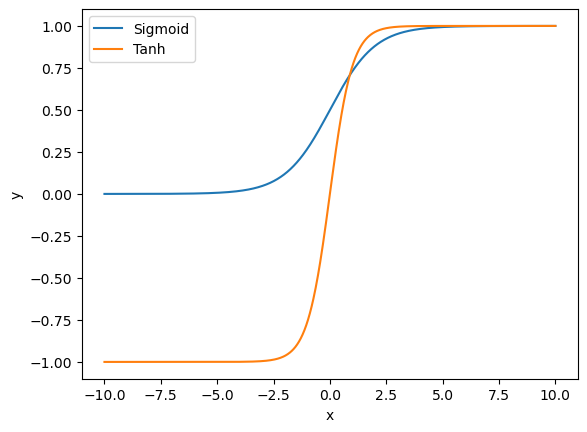

In [406]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

x = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)

plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_tanh, label='Tanh')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
pl.show()